In [1]:
% matplotlib inline
from scipy.stats import invgamma
from scipy.stats import norm
from multiprocessing import Pool
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def integral(estimate, ts):
    elements = np.ones(len(ts) - 1)
    for i in range(len(ts) - 1):
        elements[i] = (ts[i+1] - ts[i])*(estimate[i+1] + estimate[i])/2
    return sum(elements)

def sum1(beta):
    return np.sum(p[:, 0] - beta * p[:, 3])

def sum2(alpha):
    return np.sum(p[:, 3] * (p[:, 0] - alpha))

def sum3(alpha, beta):
    l = (p[:, 0] - alpha - beta*p[:, 3])
    return np.sum(l * l )

def loglike(alpha, beta, sigma):
    return N*np.log(1/(np.sqrt(2*np.pi*sigma))) - sum3(alpha, beta) / (2*sigma)

def function1(w):
    
    if w < m:
        np.random.seed(datetime.now().microsecond)

        for i in range(n+1):
            t = ts[i]
            
            if i == 0:
                alphas[0] = 3000
                betas[0] = 185
                sigmas[0] = 90000

            else:
                alphas[0] = np.mean(alpha_sample)
                betas[0] = np.mean(beta_sample)
                sigmas[0] = np.mean(sigma_sample)

            for j in range(sample_iter -1):

                location_alpha = (sigma_alpha*t*sum1(betas[j]) + sigmas[j]*mu_alpha) / (sigma_alpha * N*t + sigmas[j])
                scale_alpha = np.sqrt((sigma_alpha * sigmas[j]) / (sigma_alpha * N*t + sigmas[j]))
                alphas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum2(alphas[j+1]) + sigmas[j] * mu_beta) / (sigma_beta *t* ssx + sigmas[j])
                scale_beta = np.sqrt((sigmas[j] * sigma_beta) / (sigma_beta *t* ssx + sigmas[j]))
                betas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum3(alphas[j+1], betas[j+1]) + 2)
                sigmas[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            alpha_sample = alphas[burn_in:]
            beta_sample = betas[burn_in:len(betas)]
            sigma_sample = sigmas[burn_in:len(sigmas)]

            box = np.ones(len(alpha_sample))
            for k, l in enumerate(alpha_sample):
                box[k] = loglike(l, beta_sample[k], sigma_sample[k])

            estimates[i] = np.average(box)
        
        return estimates
    
def sum4(beta):
    return np.sum(p[:, 0] - beta * p[:, 4])

def sum5(alpha):
    return np.sum(p[:, 4] * (p[:, 0] - alpha))

def sum6(alpha, beta):
    l = (p[:, 0] - alpha - beta*p[:, 4])
    return np.sum(l * l )  

def loglike2(alpha, beta, sigma):
    return N*np.log(1/(np.sqrt(2*np.pi*sigma))) - sum6(alpha, beta) / (2*sigma)
    
def function2(w):
    if w < m:
        np.random.seed(datetime.now().microsecond)

        for i in range(n+1):
            t = ts[i]
            
            if i == 0:
                gammas[0] = 3000
                deltas[0] = 185
                taus[0] = 90000

            else:
                gammas[0] = np.mean(gamma_sample)
                deltas[0] = np.mean(delta_sample)
                taus[0] = np.mean(tau_sample)

            for j in range(sample_iter - 1):

                location_alpha = (sigma_alpha*t*sum4(deltas[j]) + taus[j]*mu_alpha) / (sigma_alpha * N*t + taus[j])
                scale_alpha = np.sqrt((sigma_alpha * taus[j]) / (sigma_alpha * N*t + taus[j]))
                gammas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

                location_beta = (sigma_beta * t * sum5(gammas[j+1]) + taus[j] * mu_beta) / (sigma_beta *t* ssz + taus[j])
                scale_beta = np.sqrt((taus[j] * sigma_beta) / (sigma_beta *t* ssz + taus[j]))
                deltas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

                shape = N*t/2 + a
                invrate = 2*b / (b*t*sum6(gammas[j+1], deltas[j+1]) + 2)
                taus[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

            gamma_sample = gammas[burn_in:]
            delta_sample = deltas[burn_in:len(deltas)]
            tau_sample = taus[burn_in:len(taus)]

            box2 = np.ones(len(gamma_sample))
            for k, l in enumerate(gamma_sample):
                box2[k] = loglike2(l, delta_sample[k], tau_sample[k])

            estimates[i] = np.average(box2)
        
        return estimates

In [18]:
pine = pd.read_table("pine.txt", delim_whitespace = True)
p = pine.values
pine['ave_x'] = pine['x'] - np.average(p[:, 1])
pine['ave_z'] = pine['z'] - np.average(p[:, 2])
p = pine.values

mu_alpha = 3000
sigma_alpha = 10**6
mu_beta = 185
sigma_beta = 10**4
a = 3
b = 1/(2*300**2)

N = np.shape(p)[0]
ssx = np.sum(p[:, 3] * p[:, 3])
ssz = np.sum(p[:, 4] * p[:, 4])

n = 10
c = 2
ts = [(i/n)**c for i in range(n+1)]
estimates = np.ones(n+1)

####ここをいじってね。
sample_iter = 1000
burn_in = 30
m = 10
core = 2
####

alphas = np.ones(sample_iter)
betas = np.ones(sample_iter)
sigmas = np.ones(sample_iter)

gammas = np.ones(sample_iter)
deltas = np.ones(sample_iter)
taus = np.ones(sample_iter)

収束の確認

In [5]:
# model 1

n = 10
c = 2
t = (1/n)**c

alphas[0] = 3000
betas[0] = 185
sigmas[0] = 90000

for j in range(sample_iter -1):

    location_alpha = (sigma_alpha*t*sum1(betas[j]) + sigmas[j]*mu_alpha) / (sigma_alpha * N*t + sigmas[j])
    scale_alpha = np.sqrt((sigma_alpha * sigmas[j]) / (sigma_alpha * N*t + sigmas[j]))
    alphas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

    location_beta = (sigma_beta * t * sum2(alphas[j+1]) + sigmas[j] * mu_beta) / (sigma_beta *t* ssx + sigmas[j])
    scale_beta = np.sqrt((sigmas[j] * sigma_beta) / (sigma_beta *t* ssx + sigmas[j]))
    betas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum3(alphas[j+1], betas[j+1]) + 2)
    sigmas[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

<function matplotlib.pyplot.plot>

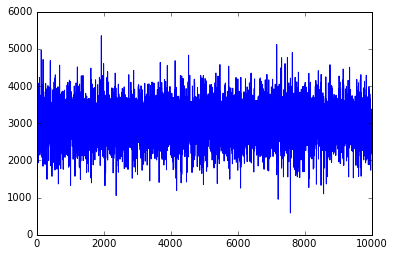

In [6]:
plt.plot(alphas)
plt.plot

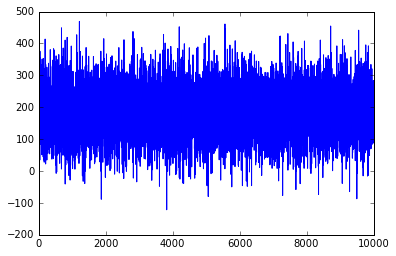

In [7]:
plt.plot(betas)

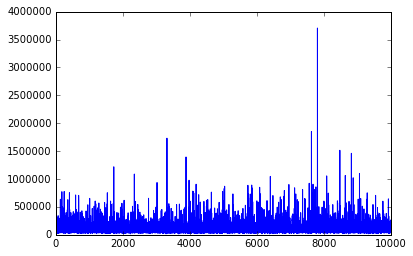

In [8]:
plt.plot( sigmas)

In [14]:
# model 2

n = 10
c = 2
t = (1/n)**c

gammas[0] = 3000
deltas[0] = 185
taus[0] = 90000

for j in range(sample_iter - 1):

    location_alpha = (sigma_alpha*t*sum4(deltas[j]) + taus[j]*mu_alpha) / (sigma_alpha * N*t + taus[j])
    scale_alpha = np.sqrt((sigma_alpha * taus[j]) / (sigma_alpha * N*t + taus[j]))
    gammas[j+1] = norm.rvs(loc = location_alpha, scale = scale_alpha)

    location_beta = (sigma_beta * t * sum5(gammas[j+1]) + taus[j] * mu_beta) / (sigma_beta *t* ssz + taus[j])
    scale_beta = np.sqrt((taus[j] * sigma_beta) / (sigma_beta *t* ssz + taus[j]))
    deltas[j+1] = norm.rvs(loc = location_beta, scale = scale_beta)

    shape = N*t/2 + a
    invrate = 2*b / (b*t*sum6(gammas[j+1], deltas[j+1]) + 2)
    taus[j+1] = invgamma.rvs(a = shape, scale = 1/ invrate)

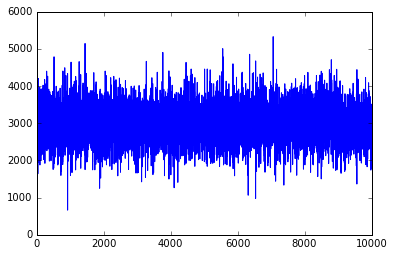

In [15]:
plt.plot(gammas)

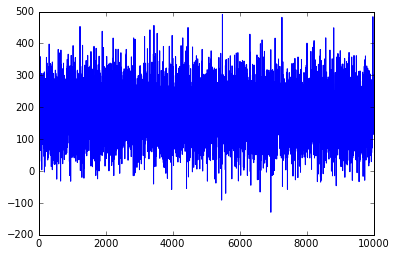

In [16]:
plt.plot(deltas)

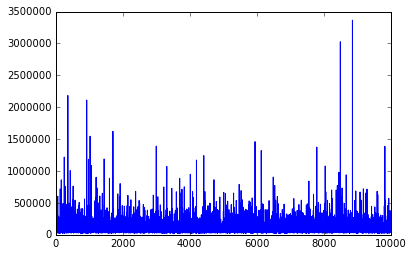

In [17]:
plt.plot(taus)

# computing BF


model1 marginal likelihood by power posterior

In [19]:
if __name__ == '__main__':
    w = Pool(core) 
    result1 = w.map(function1, range(m))

In [20]:
result1

[array([-718.93011854, -370.42525527, -327.81315741, -316.61314395,
        -311.10163073, -308.76916322, -307.34813431, -306.15018659,
        -305.4682576 , -305.11709812, -304.6626728 ]),
 array([-718.93011854, -370.42525527, -327.81315741, -316.61314395,
        -311.10163073, -308.76916322, -307.34813431, -306.15018659,
        -305.4682576 , -305.11709812, -304.6626728 ]),
 array([-740.11972899, -372.06644607, -329.41157766, -316.09725609,
        -311.28923915, -308.60304693, -307.27759024, -306.19724447,
        -305.617304  , -305.04439747, -304.7293571 ]),
 array([-740.11972899, -372.06644607, -329.41157766, -316.09725609,
        -311.28923915, -308.60304693, -307.27759024, -306.19724447,
        -305.617304  , -305.04439747, -304.7293571 ]),
 array([-753.7463692 , -369.61976628, -327.11640693, -315.95522743,
        -310.78532033, -308.71582354, -306.96452338, -306.22181311,
        -305.44473812, -305.08498762, -304.68426839]),
 array([-753.7463692 , -369.61976628, -327.11

In [21]:
expect1 = np.ones(10)
for i in range(10):
    expect1[i] = integral(result1[i], ts)

In [22]:
expect1

array([-311.35927245, -311.35927245, -311.54464403, -311.54464403,
       -311.37576308, -311.37576308, -311.49907195, -311.49907195,
       -311.49018565, -311.49018565])

model2 marginal likelihood by power posterior

In [23]:
if __name__ == '__main__':
    result2 = w.map(function2, range(m))

In [24]:
expect2 = np.ones(10)
for i in range(10):
    expect2[i] = integral(result2[i], ts)

In [25]:
expect2

array([-302.94606678, -302.94606678, -302.78515586, -302.78515586,
       -303.04867278, -303.04867278, -302.89751735, -302.89751735,
       -302.87158847, -302.87158847])

BF21

In [26]:
bf_21 = []
for a,b in zip(expect1, expect2):
    bf_21.append(np.exp(b-a))

In [27]:
bf_21

[4506.1827248839209,
 4506.1827248839209,
 6370.8499305679816,
 6370.8499305679816,
 4134.3702871730584,
 4134.3702871730584,
 5440.1102295729743,
 5440.1102295729743,
 5533.6182953588377,
 5533.6182953588377]